In [69]:
!wget -P roman_data/ https://irsa.ipac.caltech.edu/data/theory/Roman/Troxel2023/truth/dc2_index_F184_97369_9.fits

--2024-01-18 15:53:39--  https://irsa.ipac.caltech.edu/data/theory/Roman/Troxel2023/truth/dc2_index_F184_97369_9.fits
Resolving irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)... 134.4.54.110
Connecting to irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)|134.4.54.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4596480 (4.4M) [image/x-fits]
Saving to: ‘roman_data/dc2_index_F184_97369_9.fits’

dc2_index_F184_9736 100%[===================>]   4.38M  3.72MB/s    in 1.2s    

2024-01-18 15:53:41 (3.72 MB/s) - ‘roman_data/dc2_index_F184_97369_9.fits’ saved [4596480/4596480]



In [6]:
!pwd

/home/yse2/data_processing


In [1]:
# Setting up imports
from astropy.io import fits
from astropy import wcs
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
%matplotlib inline

In [2]:
fitscat = Table.read('/home/shared/hsc/DC2/raw_data/btk_3828_1,2_truthcat.fits', format='fits')
dpatch_btk = fitscat.to_pandas()

In [5]:
# Opening the FITS file
# from https://irsa.ipac.caltech.edu/data/theory/Roman/Troxel2023/detection/
# the following two FITS files are part of a set of FITS image seg maps 
# and detection for each set of four coadd images
# the files are named after CRVAL1 and CRVAL2
# which give the center coordinate as right ascension and declination in decimal degrees.
# Can be used in WCS to map pixel coords in image to corresponding celestial coords
# dc2_det_50_neg38 = fits.open('../roman_data/detection_fits/dc2_det_50.93_-42.0.fits.gz')
# dc2_seg_50_neg38 = fits.open('../roman_data/segmentation_fits/dc2_seg_50.93_-42.0.fits.gz')
# from https://irsa.ipac.caltech.edu/data/theory/Roman/Troxel2023/truth/
# coadd_list = fits.open('roman_data/dc2_coaddlist.fits.gz')
# index_list = fits.open('roman_data/dc2_index.fits')
# 
# specific_index_list = fits.open('/home/yse2/roman_data/truth_fits/dc2_index_50.93_-38.8.fits.gz')
# star_index = fits.open('roman_data/dc2_index_star.fits')
# hdulist5[1].data.names

In [6]:
specific_index_list.info()

Filename: /home/yse2/roman_data/truth_fits/dc2_index_50.93_-38.8.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     44   34378R x 18C   [K, K, K, D, D, D, D, D, D, D, D, K, K, I, D, D, D, D]   


In [8]:
print("Here is the cards in truth PrimaryHDU Header:\n")
print(specific_index_list[0].header.cards)
print("\nHere is the cards in truth BinTableHDU Header:\n")
print(specific_index_list[1].header.cards)
print("\nHere are the columns in detection BinTableHDU Header:\n")
print(specific_index_list[1].columns)

Here is the cards in truth PrimaryHDU Header:

('SIMPLE', True, 'file does conform to FITS standard')
('BITPIX', 16, 'number of bits per data pixel')
('NAXIS', 0, 'number of data axes')
('EXTEND', True, 'FITS dataset may contain extensions')
('COMMENT', "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", '')
('COMMENT', "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", '')

Here is the cards in truth BinTableHDU Header:

('XTENSION', 'BINTABLE', 'binary table extension')
('BITPIX', 8, '8-bit bytes')
('NAXIS', 2, '2-dimensional binary table')
('NAXIS1', 138, 'width of table in bytes')
('NAXIS2', 34378, 'number of rows in table')
('PCOUNT', 0, 'size of special data area')
('GCOUNT', 1, 'one data group (required keyword)')
('TFIELDS', 18, 'number of fields in each row')
('TTYPE1', 'ind', 'label for field   1')
('TFORM1', 'K', 'data format of field: 8-byte INTEGER')
('TTYPE2', 'sca', 'label for field   2')
('TFORM2', 'K', 'data format of fie

In [3]:
dc2_det_50_neg38.info()

Filename: ../roman_data/detection_fits/dc2_det_50.93_-42.0.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU    114   18909R x 53C   [J, E, E, E, E, E, E, J, D, D, D, D, D, D, D, D, D, D, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


## Exploring the Detection and Segmentation Map Files

In [6]:
print("Here is the cards in detection PrimaryHDU Header:\n")
print(dc2_det_50_neg38[0].header.cards)
print("\nHere is the cards in detection BinTableHDU Header:\n")
print(dc2_det_50_neg38[1].header.cards)
print("\nHere are the columns in detection BinTableHDU Header:\n")
print(dc2_det_50_neg38[1].columns)
# https://sextractor.readthedocs.io/en/latest/PositionWin.html
# https://github.com/nachoplus/photonpiler/blob/master/scamp.conf
# https://github.com/ewittmyl/classifier_table/blob/master/core.py
# https://sextractor.readthedocs.io/en/latest/Param.html
print("\nHere is the data in the detection BinTableHDU:")
print(dc2_det_50_neg38[1].data.shape)

Here is the cards in detection PrimaryHDU Header:

('SIMPLE', True, 'file does conform to FITS standard')
('BITPIX', 16, 'number of bits per data pixel')
('NAXIS', 0, 'number of data axes')
('EXTEND', True, 'FITS dataset may contain extensions')
('COMMENT', "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", '')
('COMMENT', "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", '')

Here is the cards in detection BinTableHDU Header:

('XTENSION', 'BINTABLE', 'binary table extension')
('BITPIX', 8, '8-bit bytes')
('NAXIS', 2, '2-dimensional binary table')
('NAXIS1', 250, 'width of table in bytes')
('NAXIS2', 18909, 'number of rows in table')
('PCOUNT', 0, 'size of special data area')
('GCOUNT', 1, 'one data group (required keyword)')
('TFIELDS', 53, 'number of fields in each row')
('TTYPE1', 'number', 'label for field   1')
('TFORM1', 'J', 'data format of field: 4-byte INTEGER')
('TTYPE2', 'flux_auto', 'label for field   2')
('TFORM2', 'E', 'd

In [11]:
dc2_det_50_neg38[1]

In [6]:
import numpy as np
det = Table.read('../roman_data/detection_fits/dc2_det_50.93_-42.0.fits.gz')
det.columns, det

(<TableColumns names=('number','flux_auto','fluxerr_auto','mag_auto','magerr_auto','kron_radius','background','isoareaf_image','xwin_image','ywin_image','alphawin_j2000','deltawin_j2000','x2win_image','y2win_image','xywin_image','x2win_world','y2win_world','xywin_world','awin_world','bwin_world','thetawin_world','mu_threshold','mu_max','flags','class_star','mag_auto_Y106','mag_auto_J129','mag_auto_H158','mag_auto_F184','magerr_auto_Y106','magerr_auto_J129','magerr_auto_H158','magerr_auto_F184','flux_auto_Y106','flux_auto_J129','flux_auto_H158','flux_auto_F184','fluxerr_auto_Y106','fluxerr_auto_J129','fluxerr_auto_H158','fluxerr_auto_F184','x2win_world_Y106','y2win_world_Y106','xywin_world_Y106','x2win_world_J129','y2win_world_J129','xywin_world_J129','x2win_world_H158','y2win_world_H158','xywin_world_H158','x2win_world_F184','y2win_world_F184','xywin_world_F184')>,
 <Table length=18909>
 number flux_auto fluxerr_auto ... y2win_world_F184 xywin_world_F184
 int32   float32    float32    

In [9]:
truth = Table.read('../roman_data/truth_fits/dc2_index_50.93_-42.0.fits.gz')
truth

ind,sca,dither,x,y,ra,dec,mag_Y106,mag_J129,mag_H158,mag_F184,stamp,start_row,gal_star,dered_Y106,dered_J129,dered_H158,dered_F184
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int16,float64,float64,float64,float64
1105,1,133533,5303.765149005788,4232.531420792754,50.9108713,-42.07202289999999,24.00626682376204,24.165531461556107,24.370946122276294,24.618132562525076,0,0,1,-0.03177207034649143,-0.02325252583345261,-0.01688892376278872,-0.013073038123192049
1699,2,133533,1477.2930920351255,6696.015749326172,50.9931668,-42.0326599,26.61884122452046,26.63142736834702,26.745135424945524,26.938483758744816,0,0,1,-0.04321879385095784,-0.03163548507313507,-0.0229800978202519,-0.01774413360551108
1711,1,133533,5490.333289130025,5793.144849485933,50.906866,-42.0470957,25.185924217562707,25.22956135444051,25.48031107378725,25.761320493843368,0,0,1,-0.0028737270771053147,-0.0021203591889005224,-0.001583676801331535,0.0
1739,1,133533,8273.020555533014,1734.9634884698162,50.8469293,-42.1118862,23.851874826530867,23.96080526396823,24.117537035013264,24.331119083692442,0,0,1,0.0,0.0,0.0,0.0
5422,2,133533,688.4221455383004,1923.390766276887,51.0102267,-42.1088787,26.95876800020018,27.02627817856675,27.173446264243807,27.373444499680843,0,0,1,-0.15908159179119963,-0.11590927238035675,-0.08445235396198214,-0.06528538194717726
7103,1,133535,516.1625281684355,7043.158023501665,51.0138274,-42.0271021,25.944946699265657,26.010701620378427,26.12210204244682,26.31219783554619,0,0,1,0.0,0.0,0.0,0.0
7116,1,133534,1700.1111636953901,4206.756580570285,50.988411899999996,-42.0724214,26.463037963520573,26.781966543401413,27.143369157105052,27.467695293211527,0,0,1,-0.07264795727641271,-0.05345229366956872,-0.0391541429410438,-0.030373338198916855
8675,1,133533,5871.253434192683,2209.588714285628,50.8986446,-42.10433110000001,27.101726082668876,27.370293123621217,27.677315357142568,27.942457537452874,0,0,1,0.0,0.0,0.0,0.0
151916,1,133534,7382.637363130158,5700.998304521057,50.8661636,-42.0485521,16.94102070220137,16.777412847638633,16.746298873538112,16.855626153171396,0,0,1,0.0,0.0,0.0,0.0


The number of rows matches the number of images that the paper talks about (21382 images)

In [4]:
print(f"Here is the WCS coord of one object in detection BinTableHDU: {dc2_det_50_neg38[1].data['number'][0]}")
print(f"RA: {dc2_det_50_neg38[1].data['alphawin_j2000'][0]}, DEC: {dc2_det_50_neg38[1].data['deltawin_j2000'][0]}")
print(f"\nHere are the pixel coordinates (xwin, ywin, x2win, y2win) of the same object:")
print(f"({dc2_det_50_neg38[1].data['xwin_image'][0]}, {dc2_det_50_neg38[1].data['ywin_image'][0]}, {dc2_det_50_neg38[1].data['x2win_image'][0]}, {dc2_det_50_neg38[1].data['y2win_image'][0]})")
print(f"\nHere are the world coordinates (x2win, y2win) of the same object:")
print(f"({dc2_det_50_neg38[1].data['x2win_world'][0]}, {dc2_det_50_neg38[1].data['y2win_world'][0]})")

Here is the WCS coord of one object in detection BinTableHDU: 1
RA: 50.96352709696226, DEC: -42.135361417444

Here are the pixel coordinates (xwin, ywin, x2win, y2win) of the same object:
(2859.158418792773, 267.7832145626696, 2.5051649778353413, 2.5105234264832865)

Here are the world coordinates (x2win, y2win) of the same object:
(6.391076554317412e-10, 6.404511218389584e-10)


In [34]:
print(dc2_seg_50_neg38.info())
print("\nHere is the cards in segmap PrimaryHDU Header:\n")
print(dc2_seg_50_neg38[0].header.cards)
# print(dc2_seg_50_neg38[0].header['WCSAXES'])
# Can use http://tdc-www.harvard.edu/wcstools/wcstools.wcs.html to determine WCS coordinates 
# (equatorial coords and  tangent plane projection)
# print("\nHere are the columns in segmap PrimaryHDU Header:\n")
# print(dc2_seg_50_neg38[0].columns)
print("\nHere is the Numpy Data in segmap PrimaryHDU Header:\n")
print(dc2_seg_50_neg38[0].data.shape) # Shape is 8825, 8825

Filename: roman_data/dc2_seg_50.93_-38.8.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   (8825, 8825)   int32   
None

Here is the cards in segmap PrimaryHDU Header:

('SIMPLE', True, 'This is a FITS file')
('BITPIX', 32, 'array data type')
('NAXIS', 2, 'number of array dimensions')
('NAXIS1', 8825, '')
('NAXIS2', 8825, '')
('GS_XMIN', 1, 'GalSim image minimum x coordinate')
('GS_YMIN', 1, 'GalSim image minimum y coordinate')
('GS_WCS', 'GSFitsWCS', 'GalSim WCS name')
('CTYPE1', 'RA---TAN', '')
('CTYPE2', 'DEC--TAN', '')
('CRPIX1', 4413.0, '')
('CRPIX2', 4413.0, '')
('ORIENTAT', 0.0, '')
('VAFACTOR', 1.0, '')
('CD1_1', -1.5972222222222e-05, '')
('CD1_2', 2.07226082750416e-22, '')
('CD2_1', -5.2981237534918e-23, '')
('CD2_2', 1.59722222222222e-05, '')
('CUNIT1', 'deg', '')
('CUNIT2', 'deg', '')
('CRVAL1', 50.93157838899078, '')
('CRVAL2', -38.819609375, '')
('EQUINOX', 2000.0, '')
('WCSAXES', 2, '')
('WCSNAME', 'wfiwcs_7.6.

In [7]:
# for every RA and DEC, convert it to WCS pixel coordinate. Then, round that coordinate to nearest number and use it to access the value of the object
# that value gets put into a dict where the key is the value of object and the value is RA and DEC 
# https://docs.astropy.org/en/stable/wcs/loading_from_fits.html
def load_wcs_from_header(header):
    # Parse the WCS keywords in the primary HDU
    w = wcs.WCS(header)

    # Print out the "name" of the WCS, as defined in the FITS header
    print(w.wcs.name)

    # Print out all of the settings that were parsed from the header
    # w.wcs.print_contents()

    # Three pixel coordinates of interest.
    # Note we know an NAXIS=2 image here.
    # The pixel coordinates are pairs of [X, Y].
    # The "origin" argument indicates whether the input coordinates
    # are 0-based (as in Numpy arrays) or
    # 1-based (as in the FITS convention, for example coordinates
    # coming from DS9). We have Numpy arrays.
    return w

w = load_wcs_from_header(dc2_seg_50_neg38[0].header)
# pixcrd = np.array([], dtype=np.float64)
worldcrd = np.array([[dc2_det_50_neg38[1].data['alphawin_j2000'][5680], dc2_det_50_neg38[1].data['deltawin_j2000'][5680]]], dtype=np.float64)
# worldcrd2 = np.array([[50.98626960319034, -38.883108253630105]], dtype=np.float64)
# world = w.wcs_pix2world(pixcrd, 0)
pixcrd = w.wcs_world2pix(worldcrd, 0)
print(pixcrd[0])
# print(worldcrd)
# PIXCRD REPRESENTS ROWS, COLS SO THAT TRANSLATES TO COLS --> X AND ROWS --> Y

wfiwcs_7.6.8_0.5
[1670.42819013 3070.30682067]


In [9]:
w = wcs.WCS(dc2_seg_50_neg38[0].header)
classes = {}
for i in range(dc2_seg_50_neg38[0].data.shape[0]):
    key = (dc2_det_50_neg38[1].data['alphawin_j2000'][i], dc2_det_50_neg38[1].data['deltawin_j2000'][i])
    worldcrd = np.array([[dc2_det_50_neg38[1].data['alphawin_j2000'][i], dc2_det_50_neg38[1].data['deltawin_j2000'][i]]], dtype=np.float64) # grabbing the worldcrd from the detection FITS file
    pixcrd = w.wcs_world2pix(worldcrd, 0)
    if (pixcrd[0][0] >= 3550) and (pixcrd[0][0] <= 3555):
        print(pixcrd[0])
    class_number = dc2_seg_50_neg38[0].data[round(pixcrd[0][1]),round(pixcrd[0][0])] # reverse pixcrd x and y
    classes[key] = class_number

[3552.78006025   30.35364615]
[3551.46036067  308.51709022]
[3553.12972021  317.56139449]
[3553.27103836 1256.51819306]
[3554.01685927 1832.71359818]
[3552.38329689 2339.95878885]
[3550.51007613 3026.74466573]


In [13]:
import csv
csv_file = "dc2_det_50.93_-38.8-labels.csv"
with open(csv_file, 'w') as csvFile:
    writer = csv.DictWriter(csvFile, fieldnames=classes.keys())
    writer.writeheader()
    writer.writerow(classes)

In [16]:
from collections import Counter

print(type(classes))
def print_duplicates(dict_data):
    # Flatten the list of values and count each occurrence
    counter = Counter([item for item in dict_data.values()])
    
    # Print values that have more than one occurrence
    for value, count in counter.items():
        if count > 1:
            print(f"Value {value} appears {count} times")

# Assuming `dict_data` is your dictionary
print_duplicates(classes)

<class 'dict'>
Value 0 appears 1222 times
Value 521 appears 2 times
Value 525 appears 2 times
Value 2058 appears 2 times
Value 2199 appears 2 times
Value 2291 appears 2 times
Value 2288 appears 2 times
Value 2295 appears 2 times
Value 2282 appears 2 times
Value 2530 appears 2 times
Value 3582 appears 2 times
Value 4683 appears 2 times
Value 4871 appears 2 times
Value 5081 appears 2 times
Value 5090 appears 2 times
Value 5605 appears 2 times
Value 6207 appears 2 times
Value 6253 appears 2 times
Value 6305 appears 2 times
Value 7232 appears 2 times
Value 7778 appears 2 times


In [8]:
# dc2_seg_50_neg38[0].data[5220:5230,2550:2560]
# np.nonzero(dc2_seg_50_neg38[0].data[5220:5230,2550:2560])
# dc2_det_50_neg38[1].data
# We have accomplished taking a RA DEC from detection file and assigning that coord with an index from the segmentation file.
# dc2_seg_50_neg38[0].data[round(pixcrd[0][0]),round(pixcrd[0][1])] WRONG
# 8248.91708732, 3752.53136866
dc2_seg_50_neg38[0].data[round(pixcrd[0][1]),round(pixcrd[0][0])] # Right
# dc2_seg_50_neg38[0].data[3753,8249] # Right
# dc2_seg_50_neg38[0].data[312:320,6863:6870] # first is rows so y, second is cols so x
# np.unique(dc2_seg_50_neg38[0].data)
# np.argwhere(dc2_seg_50_neg38[0].data == 72)
# dc2_seg_50_neg38[0].data[7790:7800,1600:1700]
# dc2_seg_50_neg38[0].data[318:330,6850:6860]

5681

(-0.5, 8824.5, 8824.5, -0.5)

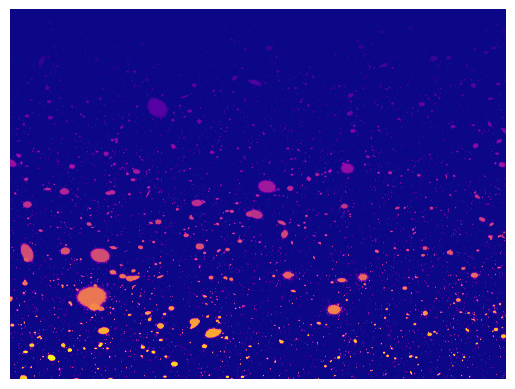

In [11]:
# fig, ax = subplots(figsize=(18, 2))
# ax.imshow(random.rand(8, 90),

plt.imshow(dc2_seg_50_neg38[0].data, cmap='plasma', aspect='auto')
plt.axis('off')
# plt.scatter(2072.7436467 , 6542.71723296, s=250, c='white', marker='x', alpha=0.2)
# plt.scatter(6863.66508634, 421.16555088, s=250, c='white', marker='x', alpha=0.2)
# plt.scatter(6193.44139591, 3656.62353883, s=250, c='white', marker='x', alpha=0.2)
# plt.scatter(6866, 315, s=250, c='white', marker='x', alpha=0.2)
# plt.scatter(6193.44139591, 3481.62353883, s=250, c='white', marker='x', alpha=0.2)
# plt.scatter(3361.57355975, 5755.65154662, s=250, c='white', marker='x', alpha=0.2) 
# plt.scatter(5228.36219793, 2557.49771184, s=250, c='red', marker='o', alpha=0.2)
# FOR SCATTER, DO OG PIXCRD BUT FOR ACCESSING DATA, YOU NEED TO REVERSE PIXCRD
# plt.scatter(pixcrd[0][0], pixcrd[0][1], s=150, c='white', marker='x', alpha=0.5)
# plt.scatter(8248.91708732, 3752.53136866, s=250, c='white', marker='x', alpha=0.5)
# plt.scatter(6855, 318, s=250, c='white', marker='x', alpha=0.5)
# plt.scatter(3752.53136866,8248.91708732, s=250, c='white', marker='x', alpha=0.2)
# 1 - [3564.05378073  167.62063372]
# plt.xlim([3550, 3570])
# plt.ylim([160, 170])
# 19100 - [1665.91800032 7792.82684783]
# plt.xlim([1600, 1700])
# plt.ylim([7790, 7800])
# 19000 - [1116.85867842 7692.21040847]
# plt.xlim([1110,1120])
# plt.ylim([7690,7700])

# plt.xlim([8247, 8251])
# plt.ylim([3750,3760])
# plt.xlim([3700,3800])
# plt.xlim([2000,2100])
# plt.ylim([3000,4000])
# plt.xlim([6180,6200])
# plt.ylim([5900,6000])
# plt.xlim([5700,5800])
# plt.ylim([2500,2600])
# plt.xlim([3300,3400])
# plt.ylim([5700,5800])
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset


## Exploring the Truth Coadd and Index Files

### Exploring dc2_index_50.93_-38.8.fits.gz

In [27]:
print(specific_index_list.info())
print("Here is the cards in specifc_index PrimaryHDU Header:\n")
print(specific_index_list[0].header.cards)
print("\nHere is the cards in specific_index BinTableHDU Header:\n")
print(specific_index_list[1].header.cards)
print("\nHere are the columns in specific_index BinTableHDU Header:\n")
print(specific_index_list[1].columns)
print("\nHere is the data in the specific_index BinTableHDU:")
print(specific_index_list[1].data)
# print("\n",len(truth_vals[0]), ",", len(truth_vals[1]))
# if any(specific_index_list[1].data["ra"] > 50.846809977296765 and ):
#     print("\nThere is a match")

Filename: roman_data/dc2_index_50.93_-38.8.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     44   34378R x 18C   ['K', 'K', 'K', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'K', 'K', 'I', 'D', 'D', 'D', 'D']   
None
Here is the cards in specifc_index PrimaryHDU Header:

('SIMPLE', True, 'file does conform to FITS standard')
('BITPIX', 16, 'number of bits per data pixel')
('NAXIS', 0, 'number of data axes')
('EXTEND', True, 'FITS dataset may contain extensions')
('COMMENT', "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", '')
('COMMENT', "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", '')

Here is the cards in specific_index BinTableHDU Header:

('XTENSION', 'BINTABLE', 'binary table extension')
('BITPIX', 8, '8-bit bytes')
('NAXIS', 2, '2-dimensional binary table')
('NAXIS1', 138, 'width of table in bytes')
('NAXIS2', 34378, 'numb

In [39]:
# ra_arr, dec_arr = specific_index_list[1].data["ra"], specific_index_list[1].data["dec"]
# ra_arr = np.append(ra_arr, 50.846809977296765)
# dec_arr = np.append(dec_arr, -38.84781894187204)
# # Iterate through the arrays and check for matches in the dictionary
# for ra, dec in zip(ra_arr, dec_arr):
#     ra_dec_pair = (ra, dec)
#     if ra_dec_pair in classes:
#         print(f"Match found for RA={ra}, DEC={dec} with value: {classes[ra_dec_pair]}")

Match found for RA=50.846809977296765, DEC=-38.84781894187204 with value: 7778


> Inside specific_index_list (index for the segmap I chose), each row is a specific object with its x and y pixel coordinates representing where they are in the segmentation map. However, it seems like for some galaxies, the coordinates on the segmap don't actually point to a specific object (16245431, 16245290).

In [82]:
print(coadd_list.info())
print("Here is the cards in coadd PrimaryHDU Header:\n")
print(coadd_list[0].header.cards)
print("\nHere is the cards in coadd BinTableHDU Header:\n")
print(coadd_list[1].header.cards)
print("\nHere are the columns in coadd BinTableHDU Header:\n")
print(coadd_list[1].columns)
print("\nHere is the data in the detection BinTableHDU:")
print(coadd_list[1].data)

-50.30 -43.90
for each detected obj, get truth info and seg map and what detection file it was in
use Cutout2D to partition smaller patches
dictionary for training the model 

can we do photometric redshift better? do deblending better? 

Filename: roman_data/dc2_coaddlist.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     25   1838R x 8C   ['11A', 'K', 'K', 'D', 'D', 'D', 'D', '260K']   
None
Here is the cards in coadd PrimaryHDU Header:

('SIMPLE', True, 'file does conform to FITS standard')
('BITPIX', 16, 'number of bits per data pixel')
('NAXIS', 0, 'number of data axes')
('EXTEND', True, 'FITS dataset may contain extensions')
('COMMENT', "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", '')
('COMMENT', "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", '')

Here is the cards in coadd BinTableHDU Header:

('XTENSION', 'BINTABLE', 'binary table extension')
('BITPIX', 8, '8-bit bytes')
('NAXIS', 2, '2-dimensional binary table')
('NAXIS1', 2139, 'width of table in bytes')
('NAXIS2', 1838, 'number of rows in table')
('PCOUNT', 0, 'size of special data area')
('GCOUN

In [64]:
print(index_list.info())
print("Here is the cards in index PrimaryHDU Header:\n")
print(index_list[0].header.cards)
print("\nHere is the cards in index BinTableHDU Header:\n")
print(index_list[1].header.cards)
print("\nHere are the columns in index BinTableHDU Header:\n")
print(index_list[1].columns)
print("\nHere is the data in the index BinTableHDU:")
print(index_list[1].data['ind'])

Filename: roman_data/dc2_index.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     44   39794R x 18C   ['K', 'K', 'K', 'D', 'D', 'D', 'D', 'D', 'K', 'K', 'K', 'K', 'K', 'D', 'D', 'D', 'D', 'K']   
None
Here is the cards in index PrimaryHDU Header:

('SIMPLE', True, 'file does conform to FITS standard')
('BITPIX', 16, 'number of bits per data pixel')
('NAXIS', 0, 'number of data axes')
('EXTEND', True, 'FITS dataset may contain extensions')
('COMMENT', "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", '')
('COMMENT', "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", '')

Here is the cards in index BinTableHDU Header:

('XTENSION', 'BINTABLE', 'binary table extension')
('BITPIX', 8, '8-bit bytes')
('NAXIS', 2, '2-dimensional binary table')
('NAXIS1', 144, 'width of table in bytes')
('NAXIS2', 39794, 'number of rows in table')
('PCOUNT',

In [53]:
print(star_index.info())
print("Here is the cards in star_index PrimaryHDU Header:\n")
print(star_index[0].header.cards)
print("\nHere is the cards in star_index BinTableHDU Header:\n")
print(star_index[1].header.cards)
print("\nHere are the columns in star_index BinTableHDU Header:\n")
print(star_index[1].columns)
print("\nHere are all the star IDS in the star_index BinTableHDU:")
print(star_index[1].data['ind'])

Filename: roman_data/dc2_index_star.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     44   239R x 18C   [K, K, K, D, D, D, D, D, K, K, K, K, K, D, D, D, D, K]   
None
Here is the cards in star_index PrimaryHDU Header:

('SIMPLE', True, 'file does conform to FITS standard')
('BITPIX', 16, 'number of bits per data pixel')
('NAXIS', 0, 'number of data axes')
('EXTEND', True, 'FITS dataset may contain extensions')
('COMMENT', "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", '')
('COMMENT', "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", '')

Here is the cards in star_index BinTableHDU Header:

('XTENSION', 'BINTABLE', 'binary table extension')
('BITPIX', 8, '8-bit bytes')
('NAXIS', 2, '2-dimensional binary table')
('NAXIS1', 144, 'width of table in bytes')
('NAXIS2', 239, 'number of rows in table')
('PCOUNT', 0, 'size of special data

In [78]:
dc2_index_F184_97369 = fits.open('roman_data/dc2_index_F184_97369_9.fits')
print(dc2_index_F184_97369.info())
print("Here is the cards in dc2_index_F184_97369 PrimaryHDU Header:\n")
print(dc2_index_F184_97369[0].header.cards)
print("\nHere is the cards in dc2_index_F184_97369 BinTableHDU Header:\n")
print(dc2_index_F184_97369[1].header.cards)
print("\nHere are the columns in test_star_index BinTableHDU Header:\n")
print(dc2_index_F184_97369[1].columns)
print("\nHere are all the star IDS in the test_star_index BinTableHDU:")
print(dc2_index_F184_97369[1].data['x'])

Filename: roman_data/dc2_index_F184_97369_9.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     44   31854R x 18C   [K, K, K, D, D, D, D, D, K, K, K, K, K, D, D, D, D, K]   
None
Here is the cards in dc2_index_F184_97369 PrimaryHDU Header:

('SIMPLE', True, 'file does conform to FITS standard')
('BITPIX', 16, 'number of bits per data pixel')
('NAXIS', 0, 'number of data axes')
('EXTEND', True, 'FITS dataset may contain extensions')
('COMMENT', "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", '')
('COMMENT', "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", '')

Here is the cards in dc2_index_F184_97369 BinTableHDU Header:

('XTENSION', 'BINTABLE', 'binary table extension')
('BITPIX', 8, '8-bit bytes')
('NAXIS', 2, '2-dimensional binary table')
('NAXIS1', 144, 'width of table in bytes')
('NAXIS2', 31854, 'number of rows in table')
('P

In [41]:
conda list

# packages in environment at /home/yse2/.conda/envs/deepdisc:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main    conda-forge
_openmp_mutex             5.1                       1_gnu  
_pytorch_select           2.0                      cuda_2    https://ftp.osuosl.org/pub/open-ce/1.8.0
absl-py                   0.12.0           py39h6ffa863_0  
aiohttp                   3.8.5            py39hf118e41_0  
aiosignal                 1.2.0              pyhd3eb1b0_0  
antlr4-python3-runtime    4.9.3                    pypi_0    pypi
astropy                   5.1              py39h693b716_0  
asttokens                 2.0.5              pyhd3eb1b0_0  
async-timeout             4.0.2            py39h6ffa863_0  
attrs                     23.1.0           py39h6ffa863_0  
autograd                  1.6.2                    pypi_0    pypi
av                        8.0.3            py39h2698049_3    https://ftp.osuosl.or